Selamat datang di Airbnb Analysis Corp! Tugas kita adalah menetapkan harga harian yang bersaing untuk rumah klien di Bondi Beach. Saat ini, pemilik menetapkan harga $500. Kita perlu memperkirakan nilai yang adil yang seharusnya dienakkan oleh pemilik. Berikut adalah info tentang rumah tersebut. Saat kita bikin model ini, kita menyadari bahwa Airbnb bisa pakai model ini untuk tentuin harga yang adil buat properti apa pun di database mereka; kita praktis bikin saran harga buat semua calon tuan rumah!

Pemilik sudah menjadi tuan rumah sejak Agustus 2010
Lokasi: lon:151.274506, lat:33.889087
Skor ulasan saat ini 95,0 dengan 53 ulasan
Menginap minimum 4 malam
Rumah bisa menampung 10 orang.
Pemilik saat ini menetapkan biaya kebersihan sebesar $370
Rumah memiliki 3 kamar mandi, 5 kamar tidur, 7 tempat tidur.
Rumah tersedia selama 255 dari 365 hari berikutnya
Klien terverifikasi, dan mereka adalah tuan rumah super.
Kebijakan pembatalan ketat dengan periode penangguhan 14 hari.
Tuan rumah memerlukan deposit keamanan sebesar $1,500
Semua nilai ini berlaku ketat untuk bulan Juli 2018.







In [1]:
# Defining the sample client data
from dateutil import parser
dict_client = {}

dict_client['city'] = 'Bondi Beach'
dict_client['longitude'] = 151.274506
dict_client['latitude'] = -33.889087
dict_client['review_scores_rating'] = 95
dict_client['number_of_reviews'] = 53
dict_client['minimum_nights'] = 4
dict_client['accommodates'] = 10
dict_client['bathrooms'] = 3
dict_client['bedrooms'] = 5
dict_client['beds'] = 7
dict_client['security_deposit'] = 1500
dict_client['cleaning_fee'] = 370
dict_client['property_type'] = 'House'
dict_client['room_type'] = 'Entire home/apt'
dict_client['availability_365'] = 255 
dict_client['host_identity_verified'] = 't' ## 1 for yes, 0 for no 
dict_client['host_is_superhost'] = 't'
dict_client['cancellation_policy'] = 'strict_14_with_grace_period'
dict_client['host_since'] = parser.parse('01-08-2010')

Get The Data

In [2]:
from pathlib import Path
import pandas as pd

df = pd.read_csv('/kaggle/input/sydney-airbnb/sydney_airbnb.csv')
df.head()

/tmp/ipykernel_34/4153482700.py:4: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/sydney-airbnb/sydney_airbnb.csv')


,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [3]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [4]:
# We just use some features
incl = ['price', 'city', 'longitude', 'latitude', 'review_scores_rating', 'number_of_reviews', 'minimum_nights', 'security_deposit', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'property_type', 'availability_365', 'host_identity_verified', 'host_is_superhost', 'host_since', 'cancellation_policy']

df = df[incl]

In [5]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,287,t,f,30/11/09,moderate


In [6]:
df.shape

(27070, 19)

The rpice field currently has '$' in it and is a string. Let's remove it and convert it to a float datatype.
Also convert 'host_since' into data time format.

In [7]:
# import regrex
import re

# The price fields in our data frame
price_list = ['price','cleaning_fee','security_deposit']

# We change any blanks to 0 and use our regex function to remove anythings that isn't a number
for col in price_list:
    df[col] = df[col].fillna('0')
    df[col] = df[col].apply(lambda x: float(re.sub('[^0-9eE.]','',x)) if len(x)>0 else 0)



In [8]:
df['host_since'] = pd.to_datetime(df['host_since'])

/tmp/ipykernel_34/410833246.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['host_since'] = pd.to_datetime(df['host_since'])


In [9]:
df['host_since'][4]

Timestamp('2009-11-30 00:00:00')

In [10]:
df['price'].sample(10)

26994    115.0
6729     192.0
23928    196.0
4313     115.0
25081     74.0
20997    128.0
12511    175.0
17307    395.0
23243     55.0
15408    170.0
Name: price, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        27070 non-null  float64       
 8   cleaning_fee            27070 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

<Axes: ylabel='price'>

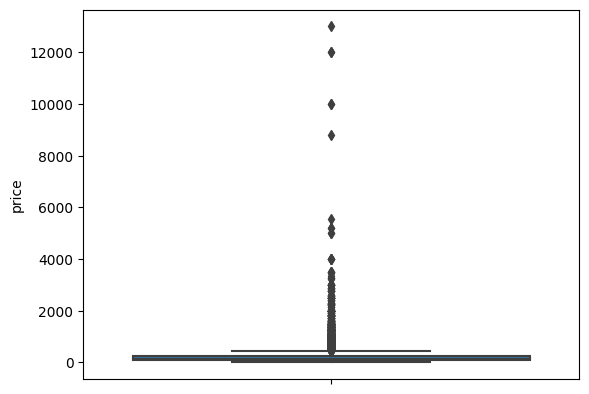

In [12]:
# Use boxplot to check for igh price values (outlier)
import seaborn as sns

sns.boxplot(y=df['price'])

In [13]:
# We can see a few high value prices, with the majority being close to bottom (seem like ~100-200)
# We now use skew to check for the summetry of the data distribution (0 being perfectly symetrical)
df['price'].skew()

13.808558337216192

Nilai skewness sebesar 13.808558337216192 adalah angka yang sangat tinggi dan menunjukkan bahwa distribusi data memiliki asimetri yang signifikan.

In [14]:
# We can also use kurtois to analysze our data
# kurtosis is the degree of peakedness a distribution

df['price'].kurtosis()

413.4301463784445

Nilai kurtosis sebesar 413.4301463784445 adalah sangat tinggi dan menunjukkan bahwa distribusi data memiliki puncak yang sangat tajam atau peaked (leptokurtik)

In [15]:
# So in order to remove or filter out our high value 'outlier' les's consider taking our data from 99.5% percentile and axclude the bottom. 25% and top 25% of prices
# The function return the highest value of the 99.5% percentile which is still relatively high when compared to the meab abd neduab

print(df['price'].quantile(0.995))
print(df['price'].mean())
print(df['price'].median())

1600.0
209.27879571481344
135.0


In [16]:
# Now we remove all price over than 99.5% percentile ( or in other words, we keep all data rows under the 99.5% value of 1600)
df = df[df['price']<df['price'].quantile(0.995)].reset_index(drop=True)

In [17]:
len(df)

26931

In [18]:
# Let's check our skew now
df['price'].skew()

2.957872457159033

In [19]:
# Let's check our data for null values
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [20]:
print(df['cancellation_policy'].value_counts())


cancellation_policy
strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: count, dtype: int64


In [21]:
print(df['city'].value_counts())


city
Bondi Beach                1671
Manly                       958
Surry Hills                 919
Bondi                       785
Randwick                    684
                           ... 
Bar Point                     1
Rozelle / Balmain             1
Bondi Junction - Sydney       1
Maraylya                      1
Kensignton                    1
Name: count, Length: 741, dtype: int64


In [22]:
print(df['property_type'].value_counts())

property_type
Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
Serviced apartment           74
Cottage                      60
Hostel                       53
Boutique hotel               25
Boat                         18
Hotel                        13
Tent                         13
Tiny house                    9
Camper/RV                     6
Resort                        6
Farm stay                     3
Island                        3
Tipi                          2
Chalet                        2
Yurt                          2
Treehouse                     1
Train                         1
Castle                        1
Dome house                

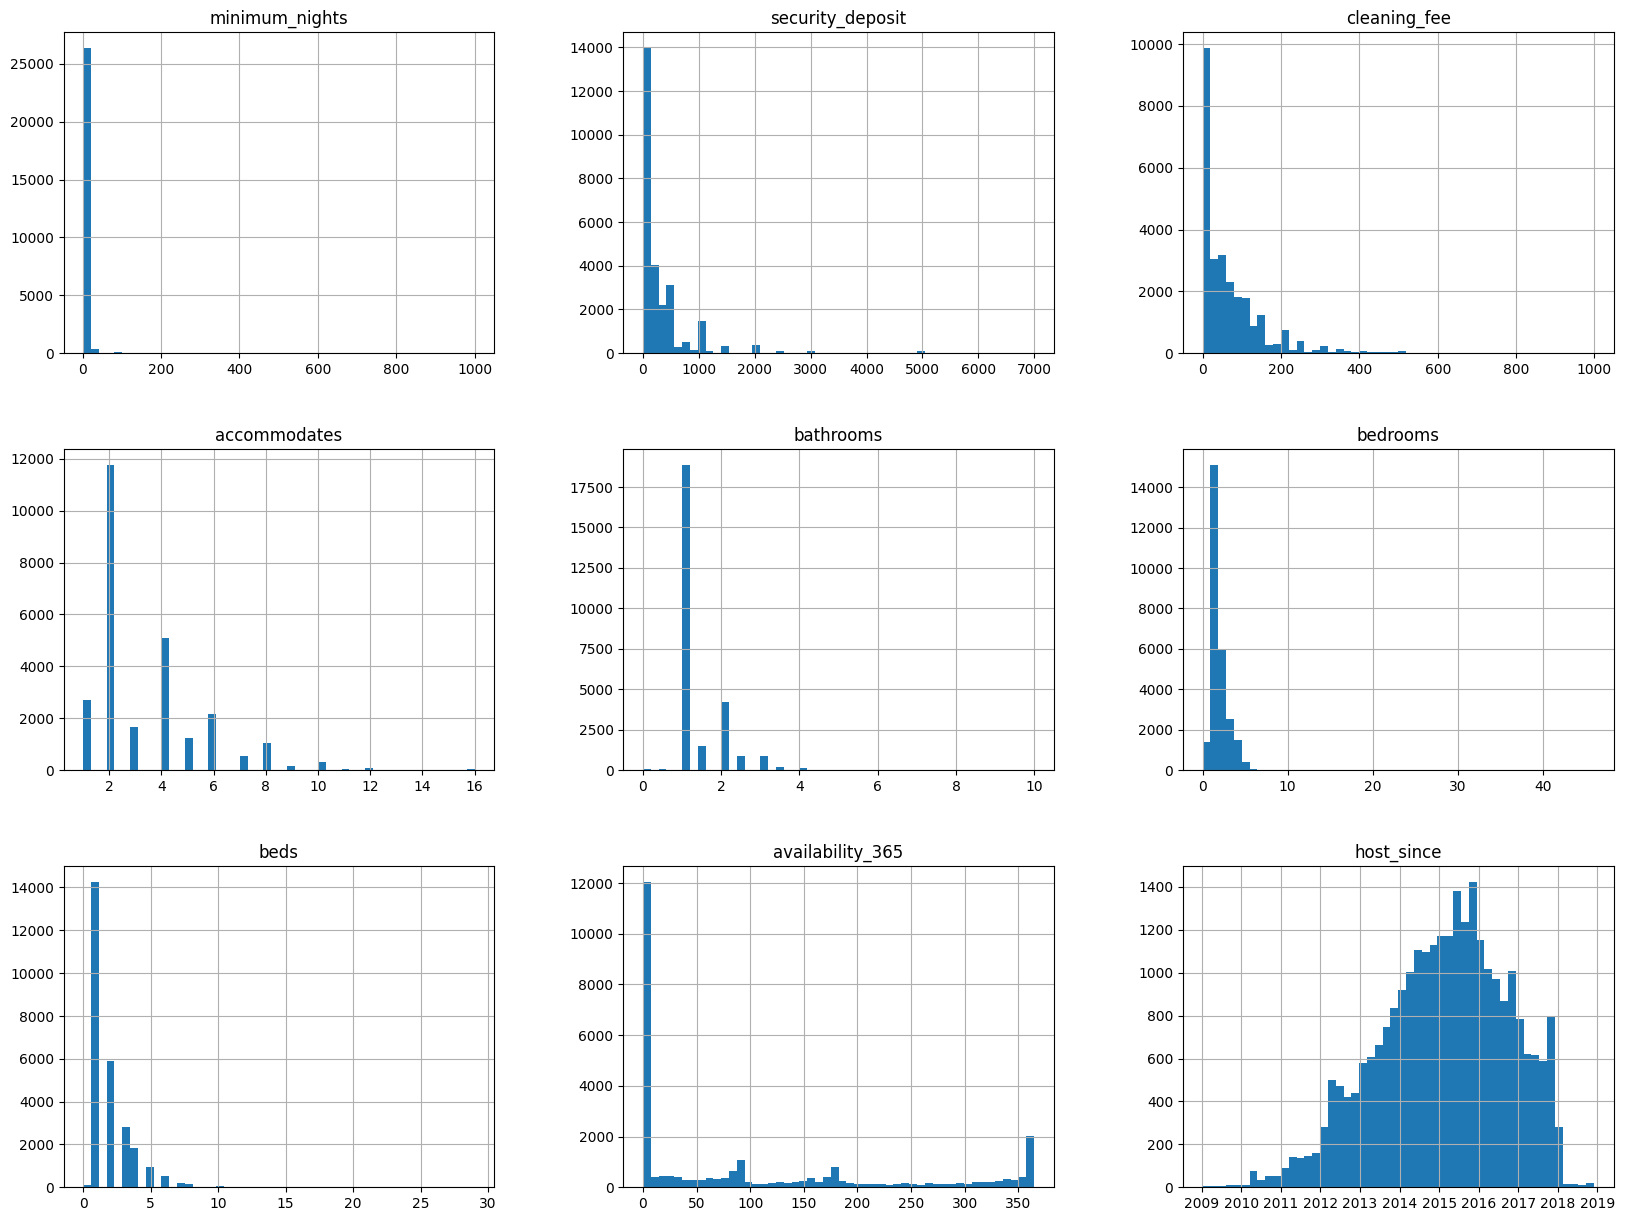

In [23]:
# Data exsploration
import matplotlib.pyplot as plt

try:
    # we select all rows and all columns after the 6th
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    # save_fig('attribute_histogram_plots')
    plt.show()
except AttributeError:
    pass

In [24]:
# We keep all the city ti create our model (more is data ussually better), even though our customer, specifcally wants information about bondi beach

df['city'].value_counts().head(20)

city
Bondi Beach       1671
Manly              958
Surry Hills        919
Bondi              785
Randwick           684
Sydney             682
Coogee             675
Darlinghurst       660
North Bondi        629
Newtown            490
Redfern            479
Maroubra           443
Paddington         443
Bondi Junction     416
Mosman             385
Potts Point        380
Bronte             367
Pyrmont            307
Waterloo           300
Glebe              259
Name: count, dtype: int64

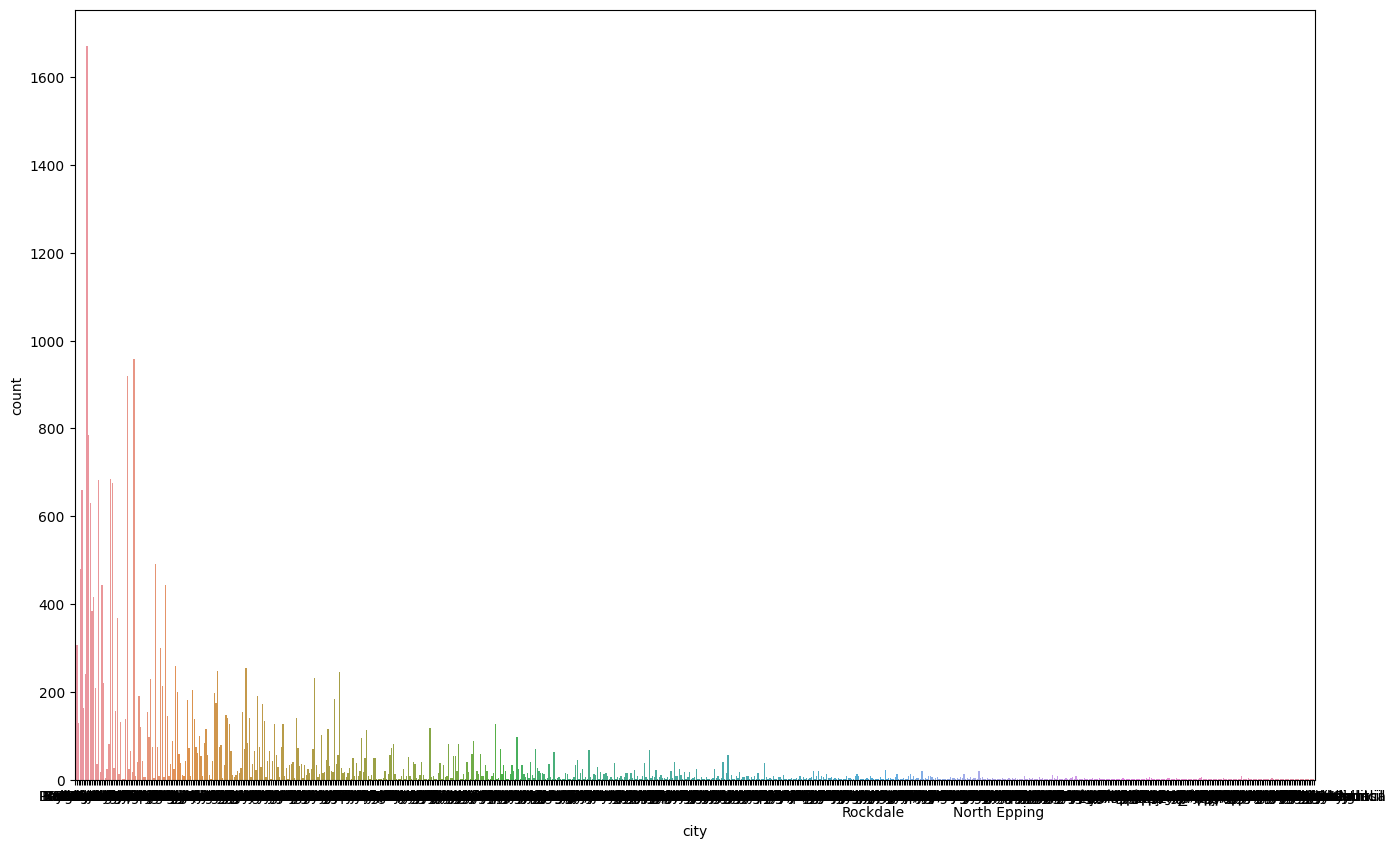

In [25]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(x='city', data=df)

In [26]:
# For this task we will keep the top 20 sydney location

list_of_20  = list(df['city'].value_counts().head(20).index)
df = df[df['city'].isin(list_of_20)].reset_index(drop=True)

In [27]:
len(df)

11932

In [28]:
df['property_type'].value_counts()

property_type
Apartment                 8303
House                     2515
Townhouse                  475
Condominium                177
Loft                        92
Guest suite                 71
Other                       53
Guesthouse                  47
Bed and breakfast           39
Hostel                      38
Villa                       30
Serviced apartment          28
Bungalow                    16
Cottage                     11
Tent                         6
Boutique hotel               6
Tiny house                   5
Resort                       5
Hotel                        4
Cabin                        2
Camper/RV                    2
Castle                       1
Yurt                         1
Chalet                       1
Aparthotel                   1
Casa particular (Cuba)       1
Earth house                  1
Houseboat                    1
Name: count, dtype: int64

In [29]:
# We now remove the rare occuraences in categories as it's neccesary for the cross validation step
# the below step is somewhat for what has been done with cities above

# we store the counts of each type in the variable item_counts
item_counts = df.groupby(['property_type']).size()

# Store a list of the rare property type here i.e. the type that have a count less than 10
rare_items = list(item_counts.loc[item_counts <= 10].index.values)

# drop the property types that were rare
df = df[~df['property_type'].isin(rare_items)].reset_index(drop=True)

# sanity check
df['property_type'].value_counts()

property_type
Apartment             8303
House                 2515
Townhouse              475
Condominium            177
Loft                    92
Guest suite             71
Other                   53
Guesthouse              47
Bed and breakfast       39
Hostel                  38
Villa                   30
Serviced apartment      28
Bungalow                16
Cottage                 11
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [31]:
train_set.shape, test_set.shape

((9516, 19), (2379, 19))

In [32]:
# similar to avove encoding, we encode binary 1, 0 for t and f
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x:1 if x=='t' else 0)

In [33]:
# we need to convert categorical columns to numerical, so we use the sklearn's function LabelEncoder to do this

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in ['city']:
    df[col+'_code'] = le.fit_transform(df[col])


In [34]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,city_code
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,339,0,1,2009-09-23,moderate,13
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,188,1,0,2009-05-14,strict_14_with_grace_period,14
2,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,215,1,0,2009-11-30,moderate,16
3,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,287,1,0,2009-11-30,moderate,16
4,111.0,Darlinghurst,151.216541,-33.880455,88.0,272,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,285,1,0,2009-03-12,strict_14_with_grace_period,5


Stafied Shuffle Split Cross-validator

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

# we will stratify according to city

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['city_code']): 
    del df['city_code']
    strat_train_set = df.loc[train_index]
    strat_test_sest = df.loc[test_index]

In [36]:
strat_train_set.shape, strat_test_sest.shape

((9516, 19), (2379, 19))

In [37]:
# Average price per data
strat_test_sest.groupby('city')['price'].mean()

city
Bondi             182.866242
Bondi Beach       199.497006
Bondi Junction    173.686747
Bronte            313.602740
Coogee            217.562963
Darlinghurst      163.576923
Glebe             135.941176
Manly             269.863874
Maroubra          148.528090
Mosman            381.948052
Newtown           122.244898
North Bondi       247.722222
Paddington        220.235955
Potts Point       164.460526
Pyrmont           192.459016
Randwick          157.145985
Redfern           125.947368
Surry Hills       150.464481
Sydney            192.992537
Waterloo          125.750000
Name: price, dtype: float64

Futher Data Exploration and Visualization

In [38]:
travel = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

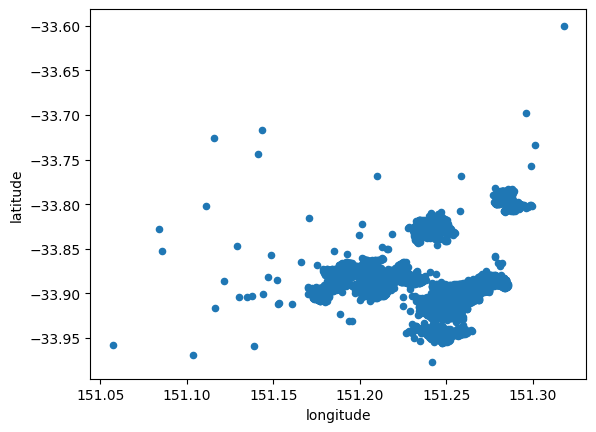

In [39]:
# Lets plot our cordinates which is a way of visualizing a map of the location 

travel.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

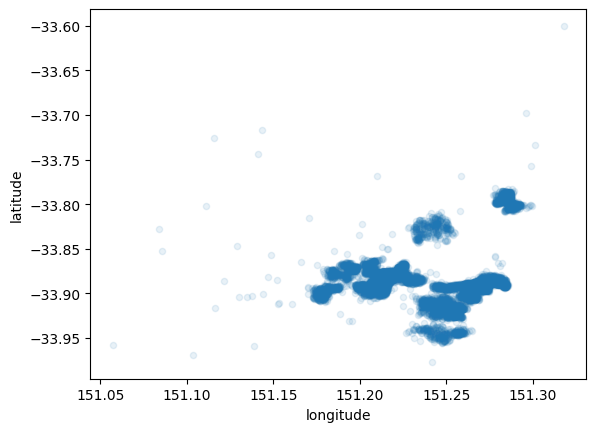

In [40]:
travel.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [41]:
# Let's narrow out visual map and remove locations outside the main area
travel_co = travel[(travel['longitude']>151.16)&(travel['latitude']<-33.75)].reset_index(drop=True)

travel_co = travel_co[travel_co['latitude']>-33.95].reset_index(drop=True)

# And only look at locations under $  600 
travel_co = travel_co[travel_co['price']<600].reset_index(drop=True)

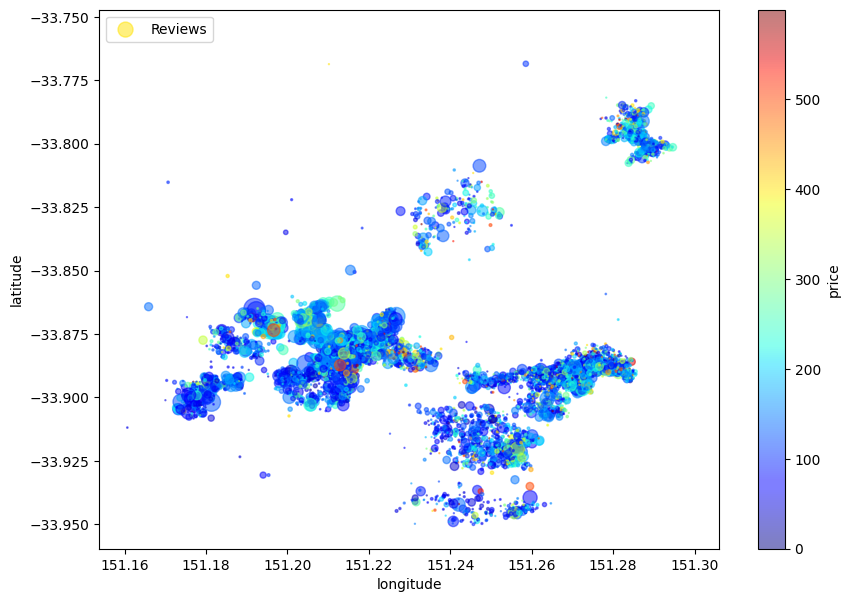

In [42]:
travel_co.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
              s=travel_co['number_of_reviews']/2, label='Reviews', figsize=(10,7),
              c='price', cmap=plt.get_cmap('jet'), colorbar=True,
              sharex=False)

plt.legend()

Text(0.5, 1.0, 'Heatmap of correlation matrix')

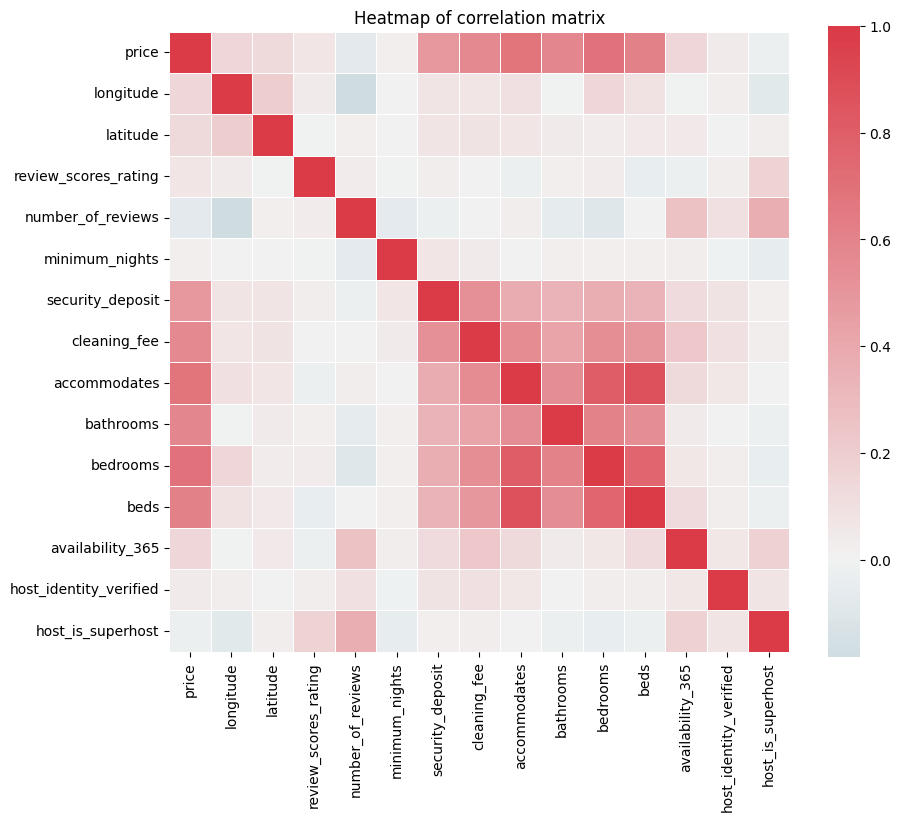

In [43]:
# Now let's explore our correlation matrix

corr_matrix = travel.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Deep dive into diverging_pattern
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, cmap=cmap, vmax=1, center=0, square=True, linewidth=.5, cbar_kws={'shrink':.82}
           )
plt.title('Heatmap of correlation matrix')

In [44]:
corr_matrix['price'].sort_values(ascending=False)

price                     1.000000
bedrooms                  0.691087
accommodates              0.685234
beds                      0.609767
bathrooms                 0.581236
cleaning_fee              0.563137
security_deposit          0.489727
availability_365          0.149385
longitude                 0.148564
latitude                  0.130787
review_scores_rating      0.064192
host_identity_verified    0.045451
minimum_nights            0.020268
host_is_superhost        -0.022273
number_of_reviews        -0.075108
Name: price, dtype: float64

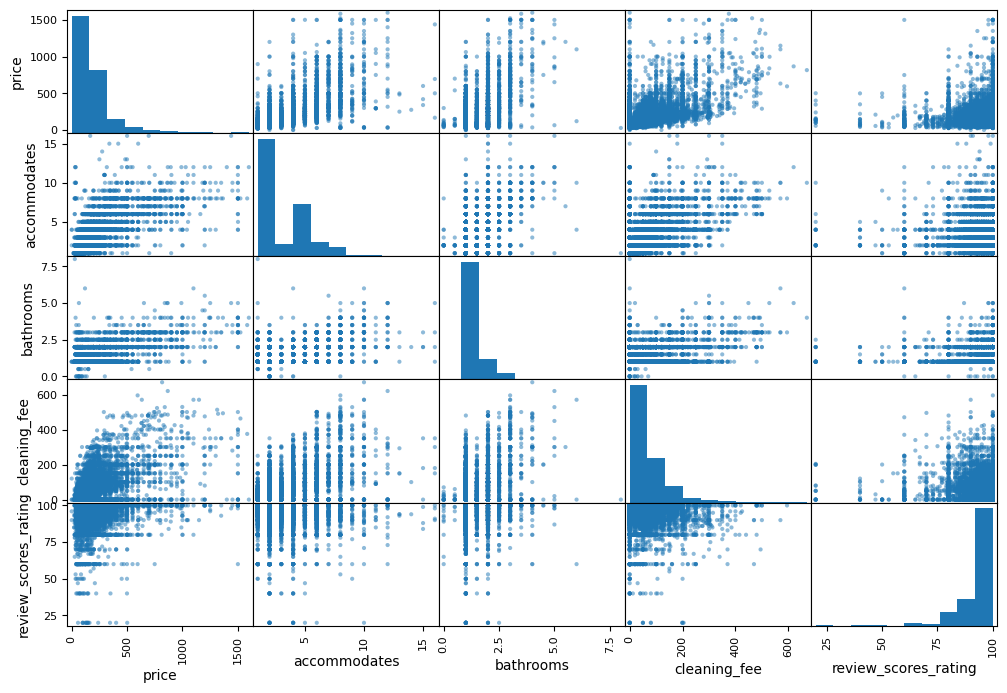

In [45]:
from pandas.plotting import scatter_matrix

attributes = ['price','accommodates','bathrooms','cleaning_fee','review_scores_rating']

scatter_matrix(travel[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='accommodates', ylabel='price'>

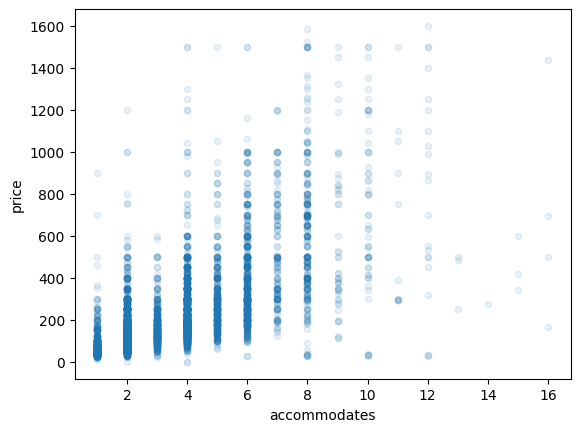

In [46]:
travel.plot(kind='scatter', x='accommodates', y='price', alpha=0.1)


In [47]:
# Now let's create some new features 

travel['bedrooms_per_person'] = travel['bedrooms']/travel['accommodates']
travel['bathrooms_per_person'] = travel['bathrooms']/travel['accommodates']
travel['host_since'] = pd.to_datetime(travel['host_since'])
travel['days_on_airbnb'] = (pd.to_datetime('today') - travel['host_since']).dt.days

In [48]:
travel.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,...,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,401.0,Manly,151.285753,-33.806062,NaN,0,5,500.0,150.0,6,...,3.0,Bed and breakfast,0,0,0,2015-11-12,strict_14_with_grace_period,0.50,0.333333,3015.0
6921,345.0,Potts Point,151.221999,-33.871736,100.0,1,2,400.0,75.0,4,...,2.0,Apartment,0,1,0,2014-09-27,strict_14_with_grace_period,0.25,0.250000,3426.0
8452,35.0,Manly,151.282773,-33.795034,100.0,1,2,200.0,0.0,2,...,1.0,Townhouse,0,0,0,2012-04-29,moderate,0.50,0.750000,4307.0
9454,45.0,Surry Hills,151.215094,-33.881693,NaN,0,1,0.0,0.0,1,...,1.0,Townhouse,0,1,0,2011-07-21,flexible,1.00,2.000000,4590.0
10166,156.0,Pyrmont,151.194151,-33.873511,94.0,63,1,0.0,50.0,4,...,3.0,Apartment,55,0,0,2014-06-05,flexible,0.50,0.250000,3540.0


Prepare Data fo Machine Learning

In [49]:
# First we remove our price (label from our travel datset)
X = travel.copy().drop('price', axis=1)

In [50]:
# Show the rows data with missing values

sample_incomplete_rows = X[X.isnull().any(axis=1)].head()

In [51]:
sample_incomplete_rows

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,Manly,151.285753,-33.806062,NaN,0,5,500.0,150.0,6,2.0,...,3.0,Bed and breakfast,0,0,0,2015-11-12,strict_14_with_grace_period,0.500000,0.333333,3015.0
9454,Surry Hills,151.215094,-33.881693,NaN,0,1,0.0,0.0,1,2.0,...,1.0,Townhouse,0,1,0,2011-07-21,flexible,1.000000,2.000000,4590.0
11301,Manly,151.278516,-33.795232,NaN,0,7,0.0,120.0,6,1.0,...,3.0,Apartment,0,1,0,2013-03-04,flexible,0.333333,0.166667,3998.0
4574,Randwick,151.243866,-33.921265,NaN,0,14,300.0,50.0,1,1.0,...,1.0,Apartment,0,0,0,2016-11-02,flexible,1.000000,1.000000,2659.0
4955,Waterloo,151.214243,-33.899925,NaN,0,3,0.0,100.0,2,2.0,...,2.0,Apartment,0,0,0,2013-08-13,strict_14_with_grace_period,0.500000,1.000000,3836.0


In [52]:
# Row remove
sample_incomplete_rows.dropna(subset=['review_scores_rating']) # option 1

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb


In [53]:
# Column remove
sample_incomplete_rows.drop(['review_scores_rating'], axis=1) # option 2

,city,longitude,latitude,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,Manly,151.285753,-33.806062,0,5,500.0,150.0,6,2.0,3.0,3.0,Bed and breakfast,0,0,0,2015-11-12,strict_14_with_grace_period,0.500000,0.333333,3015.0
9454,Surry Hills,151.215094,-33.881693,0,1,0.0,0.0,1,2.0,1.0,1.0,Townhouse,0,1,0,2011-07-21,flexible,1.000000,2.000000,4590.0
11301,Manly,151.278516,-33.795232,0,7,0.0,120.0,6,1.0,2.0,3.0,Apartment,0,1,0,2013-03-04,flexible,0.333333,0.166667,3998.0
4574,Randwick,151.243866,-33.921265,0,14,300.0,50.0,1,1.0,1.0,1.0,Apartment,0,0,0,2016-11-02,flexible,1.000000,1.000000,2659.0
4955,Waterloo,151.214243,-33.899925,0,3,0.0,100.0,2,2.0,1.0,2.0,Apartment,0,0,0,2013-08-13,strict_14_with_grace_period,0.500000,1.000000,3836.0


In [54]:
median = X['review_scores_rating'].median()
sample_incomplete_rows['review_scores_rating'].fillna(median, inplace=True) # Option 3


sample_incomplete_rows

/tmp/ipykernel_34/3999772160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows['review_scores_rating'].fillna(median, inplace=True) # Option 3


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,Manly,151.285753,-33.806062,96.0,0,5,500.0,150.0,6,2.0,...,3.0,Bed and breakfast,0,0,0,2015-11-12,strict_14_with_grace_period,0.500000,0.333333,3015.0
9454,Surry Hills,151.215094,-33.881693,96.0,0,1,0.0,0.0,1,2.0,...,1.0,Townhouse,0,1,0,2011-07-21,flexible,1.000000,2.000000,4590.0
11301,Manly,151.278516,-33.795232,96.0,0,7,0.0,120.0,6,1.0,...,3.0,Apartment,0,1,0,2013-03-04,flexible,0.333333,0.166667,3998.0
4574,Randwick,151.243866,-33.921265,96.0,0,14,300.0,50.0,1,1.0,...,1.0,Apartment,0,0,0,2016-11-02,flexible,1.000000,1.000000,2659.0
4955,Waterloo,151.214243,-33.899925,96.0,0,3,0.0,100.0,2,2.0,...,2.0,Apartment,0,0,0,2013-08-13,strict_14_with_grace_period,0.500000,1.000000,3836.0


In [55]:
# Lets fill in the missing values using sklearn's imputer, we employ the media strategy

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [56]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

X['host_is_superhost'] = X['host_is_superhost'].eq('t').astype(int)
X['host_identity_verified'] = X['host_identity_verified'].eq('t').astype(int)

X.head()

,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,...,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,Manly,151.285753,-33.806062,NaN,0,5,500.0,150.0,6,2.0,...,3.0,Bed and breakfast,0,0,0,2015-11-12,strict_14_with_grace_period,0.50,0.333333,3015.0
6921,Potts Point,151.221999,-33.871736,100.0,1,2,400.0,75.0,4,1.0,...,2.0,Apartment,0,0,0,2014-09-27,strict_14_with_grace_period,0.25,0.250000,3426.0
8452,Manly,151.282773,-33.795034,100.0,1,2,200.0,0.0,2,1.5,...,1.0,Townhouse,0,0,0,2012-04-29,moderate,0.50,0.750000,4307.0
9454,Surry Hills,151.215094,-33.881693,NaN,0,1,0.0,0.0,1,2.0,...,1.0,Townhouse,0,0,0,2011-07-21,flexible,1.00,2.000000,4590.0
10166,Pyrmont,151.194151,-33.873511,94.0,63,1,0.0,50.0,4,1.0,...,3.0,Apartment,55,0,0,2014-06-05,flexible,0.50,0.250000,3540.0


In [57]:
# Column with missing categorical values can't be imputed so we habe no attribute to drop them

cat_cols = ['city','cancellation_policy','host_since', 'property_type','host_since']
X_num = X.drop(cat_cols, axis=1)
X_num.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,151.285753,-33.806062,NaN,0,5,500.0,150.0,6,2.0,3.0,3.0,0,0,0,0.50,0.333333,3015.0
6921,151.221999,-33.871736,100.0,1,2,400.0,75.0,4,1.0,1.0,2.0,0,0,0,0.25,0.250000,3426.0
8452,151.282773,-33.795034,100.0,1,2,200.0,0.0,2,1.5,1.0,1.0,0,0,0,0.50,0.750000,4307.0
9454,151.215094,-33.881693,NaN,0,1,0.0,0.0,1,2.0,1.0,1.0,0,0,0,1.00,2.000000,4590.0
10166,151.194151,-33.873511,94.0,63,1,0.0,50.0,4,1.0,2.0,3.0,55,0,0,0.50,0.250000,3540.0


In [58]:
imputer.fit(X_num)

SimpleImputer(strategy='median')

In [59]:
imputer.statistics_

array([ 1.51246759e+02, -3.38888306e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  7.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        3.36000000e+03])

In [60]:
X_num.median().values

array([ 1.51246759e+02, -3.38888306e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  7.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        3.36000000e+03])

Transform the training set : 

In [61]:
X_num_np = imputer.transform(X_num)

In [62]:
X_num = pd.DataFrame(X_num_np, columns=X_num.columns,
                    index = list(X_num.index.values))

In [63]:
X_num.loc[sample_incomplete_rows.index.values]

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4040,151.285753,-33.806062,96.0,0.0,5.0,500.0,150.0,6.0,2.0,3.0,3.0,0.0,0.0,0.0,0.500000,0.333333,3015.0
9454,151.215094,-33.881693,96.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.000000,2.000000,4590.0
11301,151.278516,-33.795232,96.0,0.0,7.0,0.0,120.0,6.0,1.0,2.0,3.0,0.0,0.0,0.0,0.333333,0.166667,3998.0
4574,151.243866,-33.921265,96.0,0.0,14.0,300.0,50.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,2659.0
4955,151.214243,-33.899925,96.0,0.0,3.0,0.0,100.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.500000,1.000000,3836.0


In [64]:
imputer.strategy

'median'

Now let's preprocess the category input feature, ocean_proximity

In [65]:
X_cat = X.select_dtypes(include=[object])
X_cat.head()

,city,property_type,cancellation_policy
4040,Manly,Bed and breakfast,strict_14_with_grace_period
6921,Potts Point,Apartment,strict_14_with_grace_period
8452,Manly,Townhouse,moderate
9454,Surry Hills,Townhouse,flexible
10166,Pyrmont,Apartment,flexible


In [66]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9516 entries, 4040 to 4157
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 9516 non-null   object
 1   property_type        9516 non-null   object
 2   cancellation_policy  9516 non-null   object
dtypes: object(3)
memory usage: 297.4+ KB


In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9516 entries, 4040 to 4157
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    9516 non-null   object        
 1   longitude               9516 non-null   float64       
 2   latitude                9516 non-null   float64       
 3   review_scores_rating    6857 non-null   float64       
 4   number_of_reviews       9516 non-null   int64         
 5   minimum_nights          9516 non-null   int64         
 6   security_deposit        9516 non-null   float64       
 7   cleaning_fee            9516 non-null   float64       
 8   accommodates            9516 non-null   int64         
 9   bathrooms               9509 non-null   float64       
 10  bedrooms                9513 non-null   float64       
 11  beds                    9506 non-null   float64       
 12  property_type           9516 non-null   object    

In [68]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

X_cat_enc = ordinal_encoder.fit_transform(X_cat)
X_cat_enc[:10]

array([[ 7.,  1.,  2.],
       [13.,  0.,  2.],
       [ 7., 12.,  1.],
       [17., 12.,  0.],
       [14.,  0.,  0.],
       [15.,  0.,  0.],
       [ 7.,  0.,  0.],
       [15.,  0.,  0.],
       [19.,  0.,  2.],
       [ 5.,  0.,  2.]])

In [69]:
ordinal_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Bondi Junction', 'Bronte', 'Coogee',
        'Darlinghurst', 'Glebe', 'Manly', 'Maroubra', 'Mosman', 'Newtown',
        'North Bondi', 'Paddington', 'Potts Point', 'Pyrmont', 'Randwick',
        'Redfern', 'Surry Hills', 'Sydney', 'Waterloo'], dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Bungalow', 'Condominium',
        'Cottage', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft',
        'Other', 'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

In [70]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

<9516x38 sparse matrix of type '<class 'numpy.float64'>'
	with 28548 stored elements in Compressed Sparse Row format>

In [71]:
X_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [72]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # to class not return sparse array.
X_cat_1hot = cat_encoder.fit_transform(X_cat)
X_cat_1hot

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [73]:
cat_encoder.categories_

[array(['Bondi', 'Bondi Beach', 'Bondi Junction', 'Bronte', 'Coogee',
        'Darlinghurst', 'Glebe', 'Manly', 'Maroubra', 'Mosman', 'Newtown',
        'North Bondi', 'Paddington', 'Potts Point', 'Pyrmont', 'Randwick',
        'Redfern', 'Surry Hills', 'Sydney', 'Waterloo'], dtype=object),
 array(['Apartment', 'Bed and breakfast', 'Bungalow', 'Condominium',
        'Cottage', 'Guest suite', 'Guesthouse', 'Hostel', 'House', 'Loft',
        'Other', 'Serviced apartment', 'Townhouse', 'Villa'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_60'], dtype=object)]

Now let's create pipeline for preprocessing that is built on the techniques we used upa nd till now and introduce some new pipeline techniques

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
numeric= ['int16','int32','int64','float16','float32','float64']

# Recive numpy array, convert to pandas for features, convert back to array for output

class CombineAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity = True, num_cols=[]): # no args or kargs
        self.popularity = popularity
        self.num_cols = num_cols
    def fit(self, X, y=None):
        return self # nothing to do 
    def transform(self, X, y=None):
    
        # some feature engineering
        X = pd.DataFrame(X, columns=num_cols)
        X['bedrooms_per_person'] = X['bedrooms']/X['accommodates']
        X['bathrooms_per_person'] = X['bathrooms']/X['accommodates']
    
        global feats 
        feats = ['bedrooms_per_person','bathrooms_per_person']
    
        if self.popularity:
            X['past_and_future_popularity'] = X['number_of_reviews'] / (X['availability_365'] + 1)

            feats.append('past_and_future_popularity')
        
            return X.values
        else:
            return X.values

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  

strat_train_set2 = strat_train_set.dropna()
X = strat_train_set2.copy().drop('price', axis=1)
Y = strat_train_set2['price']

num_cols = list(X.select_dtypes(include=numeric).columns)
cat_cols = list(X.select_dtypes(include=[object]).columns)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombineAttributeAdder(num_cols=num_cols, popularity=True)),
    ('std_scaler',StandardScaler())
])

In [76]:
num_cols

['longitude',
 'latitude',
 'review_scores_rating',
 'number_of_reviews',
 'minimum_nights',
 'security_deposit',
 'cleaning_fee',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'availability_365',
 'host_identity_verified',
 'host_is_superhost']

In [77]:
from sklearn.compose import ColumnTransformer
import itertools

numeric= ['int16','int32','int64','float16','float32','float64']

mid_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

mid_pipeline.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombineAttributeAdder(num_cols=['longitude',
                                                                                  'latitude',
                                                                                  'review_scores_rating',
                                                                                  'number_of_reviews',
                                                                                  'minimum_nights',
                                                                                  'security_deposit',
                                                                                  'cleaning_fee',
                                                                                  'accommodates',
                                                                                  'bathrooms',
                                                                                  'bedrooms',
                                                                                  'beds',
                                                                                  'availability_365',
                                                                                  'host_identity_verif...
                                                                                  'host_is_superhost'])),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude',
                                  'review_scores_rating', 'number_of_reviews',
                                  'minimum_nights', 'security_deposit',
                                  'cleaning_fee', 'accommodates', 'bathrooms',
                                  'bedrooms', 'beds', 'availability_365',
                                  'host_identity_verified',
                                  'host_is_superhost']),
                                ('cat', OneHotEncoder(),
                                 ['city', 'property_type',
                                  'cancellation_policy'])])

In [78]:

cat_encoder = mid_pipeline.named_transformers_['cat']
sublists = [list(bas) for bas in cat_encoder.categories_]
one_cols = list(itertools.chain(*sublists))

## in this class, i will be converting numpy back to pandas

class ToPandasDF(BaseEstimator, TransformerMixin):
    def __init__(self, fit_index = []): # no args or kargs
        self.fit_index = fit_index
    def fit(self, X_df, y=None):
        return self # nothing else to do
    def transform(self, X_df, y=None):
        global cols 
        cols = num_cols.copy()
        cols.extend(feats)
        cols.extend(one_cols)
        X_df = pd.DataFrame(X_df, columns=cols, index = self.fit_index)
        
        return X_df
    
def pipe(inds):
    return Pipeline([
        ('mid', mid_pipeline),
        ('PD', ToPandasDF(inds))
    ])
    
params = {'inds' : list(X.index)}

    
X_pr = pipe(**params).fit_transform(X)
    
    

In [79]:
X_pr.head()

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,...,House,Loft,Other,Serviced apartment,Townhouse,Villa,flexible,moderate,strict_14_with_grace_period,super_strict_60
6921,-0.542614,0.325460,0.731280,-0.535199,-0.155534,0.228296,0.070936,0.421240,-0.473373,-0.503340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8452,1.338213,2.672406,0.731280,-0.535199,-0.155534,-0.187685,-0.951615,-0.645984,0.492296,-0.503340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10166,-1.404451,0.271152,0.074473,1.153893,-0.221011,-0.603666,-0.269915,0.421240,-0.473373,0.605143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11344,0.110381,-1.025326,0.731280,-0.535199,0.171850,-0.603666,-0.951615,-0.645984,-0.473373,-0.503340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5366,-0.752088,0.126075,0.402876,2.134656,-0.024580,-0.187685,0.139106,-0.645984,-0.473373,-0.503340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Select and train a model

In [80]:
from sklearn.linear_model import LinearRegression

Y_pr = Y.copy()

lin_reg = LinearRegression()
lin_reg.fit(X_pr, Y_pr)

LinearRegression()

In [81]:
# Let's try the full preprocessing pipeline on a few training instances
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]
some_data_prepared = pipe(inds = list(some_data.index)).transform(some_data)

print('Prediction', lin_reg.predict(some_data_prepared))

Prediction [206.75  134.375 180.375  80.25  120.   ]


In [82]:
print('Labels : ', list(some_labels))

Labels :  [345.0, 35.0, 156.0, 90.0, 150.0]


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_pred = lin_reg.predict(X_pr)
lin_mse = mean_squared_error(Y, X_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

93.52192706909524

In [84]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y, X_pred)
lin_mae

61.09999268792045

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_pr, Y)

DecisionTreeRegressor(random_state=42)

In [86]:
X_pred = tree_reg.predict(X_pr)
tree_mse = mean_squared_error(Y, X_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Fine-tune the model

In [87]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(random_state=42), X_pr, Y,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [88]:
def display_scores(scores):
    print('Scores :', scores)
    print('Mean : ', scores.mean())
    print('Standard deviation : ', scores.std())
    
display_scores(tree_rmse_scores)

Scores : [121.9355956  121.53498642 139.63859995 133.72738919 124.60083049
 122.35881588 123.72416737 117.35934097 125.1817712  124.93737231]
Mean :  125.49988693788211
Standard deviation :  6.136232775757512


In [89]:
lin_scores = cross_val_score(LinearRegression(), X_pr, Y,
                            scoring='neg_mean_absolute_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores : [7.89509411 7.8179557  7.97451612 7.72698668 7.95548252 7.93558451
 7.84941425 7.84861099 7.79458378 7.81411074]
Mean :  7.86123393810509
Standard deviation :  0.07432858270642775


bad performance, might need some regulation

In [90]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_pr, Y)

RandomForestRegressor(random_state=42)

In [91]:
X_pred = forest_reg.predict(X_pr)
forest_mse = mean_squared_error(Y, X_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

33.08183468825506

In [92]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_pr, Y,
                               scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores : [92.10016064 83.94608518 93.73173792 88.29355345 88.12765549 86.89844396
 88.98128706 79.90810276 90.13528547 94.58547718]
Mean :  88.6707789108876
Standard deviation :  4.2105165131311155


In [93]:
scores = cross_val_score(lin_reg, X_pr, Y, scoring='neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     94.629814
std       3.999100
min      88.847288
25%      91.941236
50%      94.473489
75%      98.315234
max      99.741461
dtype: float64

In [94]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_pr, Y)
X_pred = svm_reg.predict(X_pr)
svm_mse = mean_squared_error(Y, X_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

100.44158944267569

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3x4) combination of hyperparameters
    {'n_estimators' : [3,10,30], 'max_features':[2,4,6,8]},
    # then try 6 (2x3) combinations with bootstrap set as false
    {'bootstrap':[False], 'n_estimators':[3, 10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total pf (12+6)*5 = 90 rounds of training

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_pr, Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

let's look at the score of earh hyperparameter combination tested during the grid search

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    
print('')
print('Best grid-search performance : ', np.sqrt(-cvres['mean_test_score'].max()))

110.06955992203034 {'max_features': 2, 'n_estimators': 3}
95.80822039442657 {'max_features': 2, 'n_estimators': 10}
92.65767525926715 {'max_features': 2, 'n_estimators': 30}
104.90424130684092 {'max_features': 4, 'n_estimators': 3}
93.0255809078761 {'max_features': 4, 'n_estimators': 10}
89.62178210478535 {'max_features': 4, 'n_estimators': 30}
105.62506624143234 {'max_features': 6, 'n_estimators': 3}
93.15338510326772 {'max_features': 6, 'n_estimators': 10}
89.43826466698876 {'max_features': 6, 'n_estimators': 30}
105.41830667150431 {'max_features': 8, 'n_estimators': 3}
93.52742483906519 {'max_features': 8, 'n_estimators': 10}
89.40122940119021 {'max_features': 8, 'n_estimators': 30}
108.77735820395819 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
95.39182350368021 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
106.40003405709233 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
94.43926430888372 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [99]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033816,0.001849,0.005784,0.000355,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-11751.796093,-11461.423408,...,-12115.308021,495.994990,18,-3287.551838,-2895.072679,-2912.667439,-2948.857207,-3231.085501,-3055.046933,168.634545
1,0.087334,0.002239,0.008350,0.000409,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-8416.015862,-8937.140132,...,-9179.215095,594.312370,11,-1723.009787,-1544.544360,-1616.928973,-1620.018342,-1633.855708,-1627.671434,56.941597
2,0.251979,0.006013,0.016381,0.000132,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-7224.828472,-8465.395259,...,-8585.444784,834.201288,4,-1407.837278,-1337.476217,-1373.551675,-1287.546710,-1283.688493,-1338.020075,48.242540
3,0.034061,0.000364,0.004832,0.000043,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-9850.823749,-10018.074480,...,-11004.899844,892.215287,12,-3172.787325,-2675.003352,-3016.674711,-2752.797884,-3009.162046,-2925.285063,183.868185
4,0.099216,0.001448,0.007943,0.000137,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-7601.447387,-8498.133194,...,-8653.758703,789.570940,5,-1609.634756,-1473.851324,-1605.363973,-1569.104241,-1609.632495,-1573.517358,52.107141


In [100]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_pr, Y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db17d31e620>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db17d31cf70>},
                   random_state=42, scoring='neg_mean_squared_error')

In [101]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)


print('Best grid search performance : ', np.sqrt(-cvres['mean_test_score'].max()))

87.82655115151067 {'max_features': 7, 'n_estimators': 180}
91.52983517328556 {'max_features': 5, 'n_estimators': 15}
89.80371320617715 {'max_features': 3, 'n_estimators': 72}
89.91296245582049 {'max_features': 5, 'n_estimators': 21}
87.73750586603575 {'max_features': 7, 'n_estimators': 122}
Best grid search performance :  87.73750586603575


In [102]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([4.51080008e-02, 3.61100073e-02, 2.20640847e-02, 2.23225947e-02,
       2.34748155e-02, 7.28985889e-02, 7.53386458e-02, 1.03143606e-01,
       7.58075407e-02, 2.00270869e-01, 8.41815900e-02, 2.29087832e-02,
       6.15925272e-03, 2.46089378e-03, 2.28752645e-02, 5.51723056e-02,
       4.05263820e-02, 2.22342295e-03, 5.30851541e-03, 8.85145923e-04,
       2.29063354e-03, 2.13615975e-03, 1.78553543e-03, 7.87309613e-04,
       3.07953630e-03, 2.06833429e-03, 2.88645163e-03, 6.44688167e-04,
       3.98320355e-03, 1.61565818e-03, 1.84638247e-03, 2.02772745e-03,
       2.00892723e-03, 9.63507080e-04, 1.90486091e-03, 2.10583323e-03,
       7.21158199e-04, 1.15153239e-02, 5.13117744e-04, 1.90352043e-04,
       8.93212858e-04, 6.66842794e-06, 1.19334599e-04, 9.42534940e-04,
       8.21586328e-04, 1.01557294e-02, 4.88073788e-04, 5.53046359e-04,
       2.14942390e-04, 1.64523335e-03, 2.70078016e-03, 5.41167627e-03,
       3.67781076e-03, 8.04852016e-03, 5.83942303e-06])

In [103]:
feat = pd.DataFrame()
feat['Name'] = list(X_pr.columns)
feat['Score'] = feature_importance

In [104]:
feat.sort_values(by='Score', ascending=False).round(5).head(20)

,Name,Score
9,bedrooms,0.20027
7,accommodates,0.10314
10,beds,0.08418
8,bathrooms,0.07581
6,cleaning_fee,0.07534
5,security_deposit,0.07290
15,bathrooms_per_person,0.05517
0,longitude,0.04511
16,past_and_future_popularity,0.04053
1,latitude,0.03611


Value Estimation for CLient

In [105]:
df_client = pd.DataFrame.from_dict(dict_client, orient='index').T
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   city                    1 non-null      object
 1   longitude               1 non-null      object
 2   latitude                1 non-null      object
 3   review_scores_rating    1 non-null      object
 4   number_of_reviews       1 non-null      object
 5   minimum_nights          1 non-null      object
 6   accommodates            1 non-null      object
 7   bathrooms               1 non-null      object
 8   bedrooms                1 non-null      object
 9   beds                    1 non-null      object
 10  security_deposit        1 non-null      object
 11  cleaning_fee            1 non-null      object
 12  property_type           1 non-null      object
 13  room_type               1 non-null      object
 14  availability_365        1 non-null      object
 15  host_ident

In [106]:
df_client.iloc[0]

city                                      Bondi Beach
longitude                                  151.274506
latitude                                   -33.889087
review_scores_rating                               95
number_of_reviews                                  53
minimum_nights                                      4
accommodates                                       10
bathrooms                                           3
bedrooms                                            5
beds                                                7
security_deposit                                 1500
cleaning_fee                                      370
property_type                                   House
room_type                             Entire home/apt
availability_365                                  255
host_identity_verified                              t
host_is_superhost                                   t
cancellation_policy       strict_14_with_grace_period
host_since                  

In [107]:
# Defining the sample client data
from dateutil import parser
dict_client = {}

dict_client['city'] = 'Bondi Beach'
dict_client['longitude'] = 151.274506
dict_client['latitude'] = -33.889087
dict_client['review_scores_rating'] = 95
dict_client['number_of_reviews'] = 53
dict_client['minimum_nights'] = 4
dict_client['accommodates'] = 10
dict_client['bathrooms'] = 3
dict_client['bedrooms'] = 5
dict_client['beds'] = 7
dict_client['security_deposit'] = 1500
dict_client['cleaning_fee'] = 370
dict_client['property_type'] = 'House'
dict_client['room_type'] = 'Entire home/apt'
dict_client['availability_365'] = 255 
dict_client['host_identity_verified'] = '1' ## 1 for yes, 0 for no 
dict_client['host_is_superhost'] = '1'
dict_client['cancellation_policy'] = 'strict_14_with_grace_period'
dict_client['host_since'] = parser.parse('01-08-2010')

df_client = pd.DataFrame.from_dict(dict_client, orient='index').T

print(df_client.columns)
df_client

Index(['city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'property_type',
       'room_type', 'availability_365', 'host_identity_verified',
       'host_is_superhost', 'cancellation_policy', 'host_since'],
      dtype='object')


,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,cancellation_policy,host_since
0,Bondi Beach,151.274506,-33.889087,95,53,4,10,3,5,7,1500,370,House,Entire home/apt,255,1,1,strict_14_with_grace_period,2010-01-08 00:00:00


In [108]:
df_client = pipe(list(df_client.index)).transform(df_client)

In [109]:
df_client

,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,...,House,Loft,Other,Serviced apartment,Townhouse,Villa,flexible,moderate,strict_14_with_grace_period,super_strict_60
0,1.08237,-0.205456,0.183941,0.881459,-0.02458,2.51619,4.092967,3.622911,3.389304,3.93059,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


NameError: name 'final_model' is not defined

In [113]:
final_model = grid_search.best_estimator_

In [114]:
client_predict = final_model.predict(df_client)

In [115]:
client_predict

array([839.43333333])

In [116]:
print('\x1b[1;31m' + str(client_predict[0]) + '\x1b[0m')
print('\x1b[1;31m' + str(-500) + '\x1b[0m')
print('\x1b[1;31m' + str(client_predict[0]-500) + '\x1b[0m')

839.4333333333333
-500
339.4333333333333


In [ ]:
# client mengajukan $500 dan seharusnya dia bisa mendapatkan $339 lebih banyak 